In [1]:
WORK_DIR = '/content/drive/MyDrive/Deep_learning_project'
TEST_DATASET_PATH = f'{WORK_DIR}/Brats_2020_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
model_1_unet_vae_WEIGHTS_PATH = f'{WORK_DIR}/3d_unet_VAE/new_weights/3d_unet_VAE_weights'
model_2_unet_vae_atten_WEIGHTS_PATH = f'{WORK_DIR}/3d_atten_unet_with_VAE/final_atten_3d_unet_VAE_40/3d_atten_unet_VAE_weights'

In [2]:
import shutil
shutil.copyfile(f'{WORK_DIR}/model.py', '/content/unet_vae_model.py')
shutil.copyfile(f'{WORK_DIR}/model_2.py', '/content/unet_vae_atten_model.py')
shutil.copyfile(f'{WORK_DIR}/utils.py', '/content/utils.py')

'/content/utils.py'

In [3]:
import glob
from unet_vae_model import build_model
from unet_vae_atten_model import build_model_att
from utils import imageTestLoader, testImages
from tensorflow.python.framework.ops import disable_eager_execution

In [4]:
disable_eager_execution()
model_1_unet_vae = build_model(input_shape=( 1, 128, 128, 128), output_channels=4)
model_2_unet_vae_atten = build_model_att(input_shape=( 1, 128, 128, 128), output_channels=4)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Load models weights

model_1_unet_vae.load_weights(model_1_unet_vae_WEIGHTS_PATH)
model_2_unet_vae_atten.load_weights(model_2_unet_vae_atten_WEIGHTS_PATH)

In [12]:
t1ce_test_list = sorted(glob.glob(f'{TEST_DATASET_PATH}/*/*t1ce.nii'))
t1ce_test_mask_list = sorted(glob.glob(f'{TEST_DATASET_PATH}/*/*seg.nii'))
test_examples = imageTestLoader(t1ce_test_list, t1ce_test_mask_list)

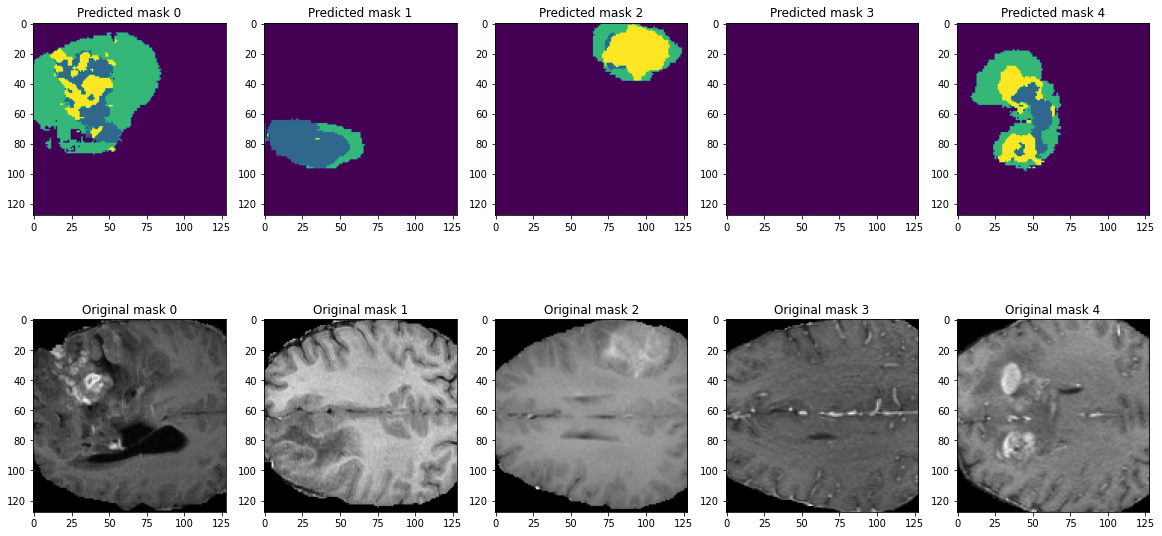

In [13]:
testImages(test_examples, model_1_unet_vae, slice=80)

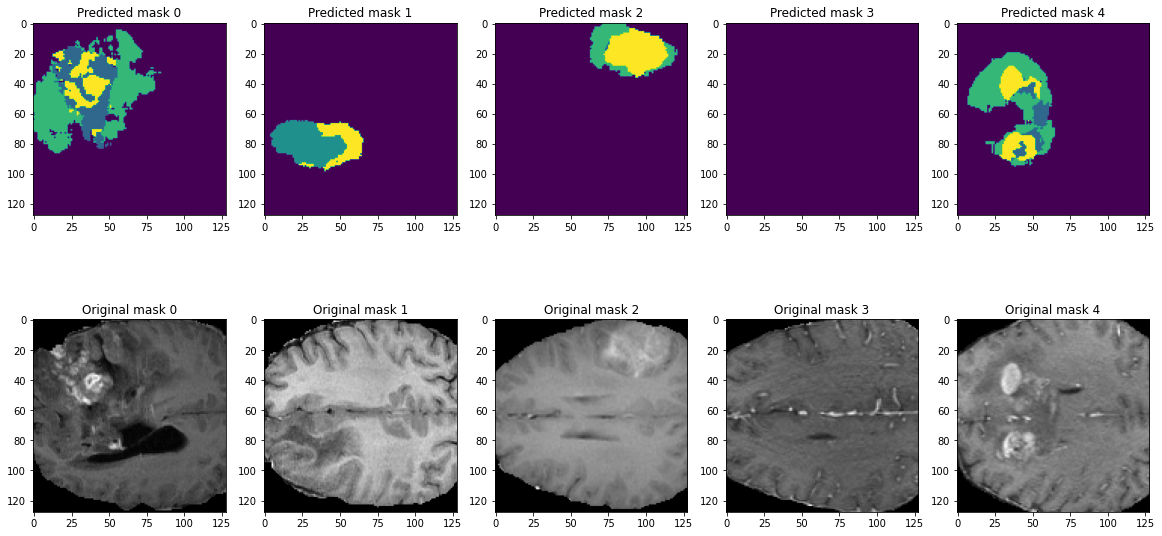

In [14]:
testImages(test_examples, model_2_unet_vae_atten, slice=80)